# **Computer vision libraries in PyTorch**

* torchvision - base domain library for PyTorch computer vision
* torchvision.datasets - get datasets and data loading functions for computer vision here
* torchvision.models - get pretrained computer vision models thaat you can leverage for your own problems
* torch.utils.data.Dataset - Base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
torch.__version__,torchvision.__version__

('2.8.0+cu126', '0.23.0+cu126')

# **Getting a dataset**

The dataset we'll be using is FashionMNIST from torchvision.datasets

In [2]:
# Setup training data
from torchvision import datasets
train_data =datasets.FashionMNIST(
    root= 'Data',  # Where to download data to?
    train= True,   # Training dataset
    download= True,
    transform= torchvision.transforms.ToTensor(),  # just ToTensor also works (how do we wanna transform tha data)
    target_transform= None   # do we wanna transform the target/labels(data)?
)

test_data = datasets.FashionMNIST(
    root= 'Data',
    train= False,
    download= True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:29<00:00, 893kB/s] 
100%|██████████| 29.5k/29.5k [00:00<00:00, 174kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.28MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.2MB/s]


In [3]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [7]:
# Check the shape of the image
print(f'Image shape: {image.shape}') # color_channels, height, width
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


# **Visualizing our data**

Image shape: torch.Size([1, 28, 28])


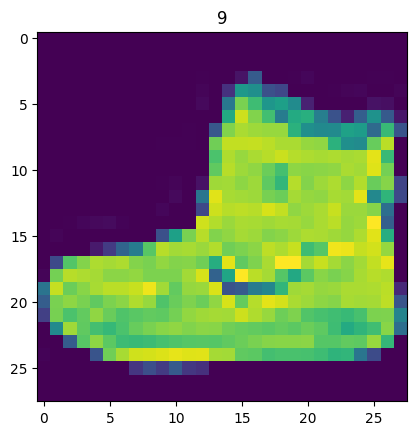

In [8]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label);

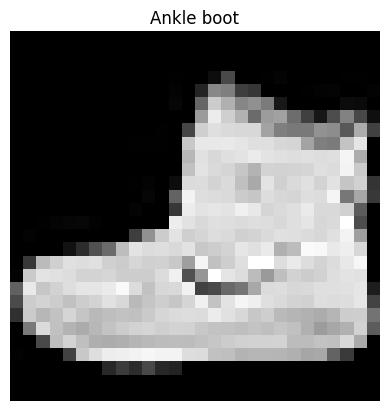

In [9]:
plt.imshow(image.squeeze(), cmap= 'gray')
plt.title(class_names[label]);
plt.axis(False);



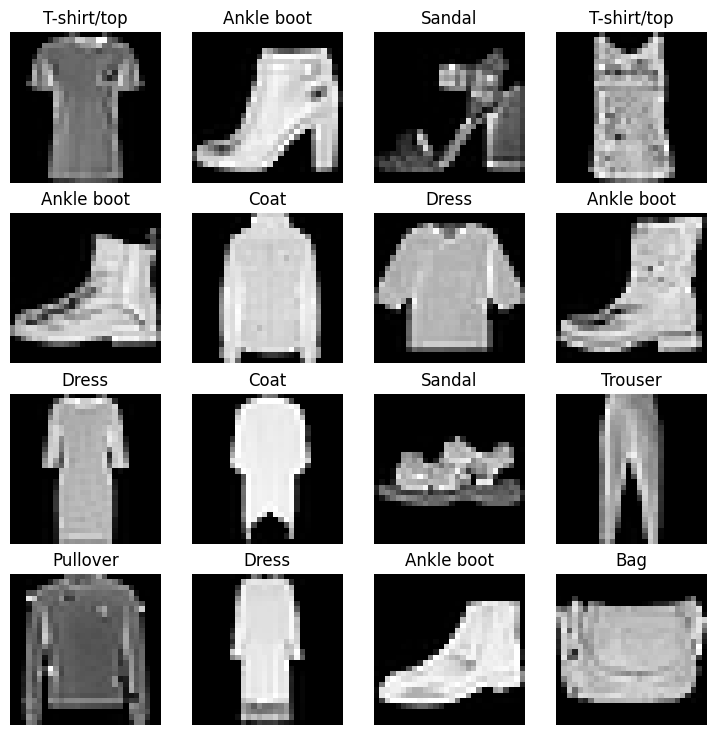

In [10]:
# Plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size= [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)


# **Prepare DataLoader**

Right now, the data is in the form of PyTorch Datasets.
DalaLoader turns our dataset into a Python iterable.
We do this to break it down to batches for more efficient computation and it gives our neural network more chances to update its gradients per epoch.

In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader  = DataLoader(dataset= train_data,
                               batch_size= BATCH_SIZE, shuffle= True )

test_dataloader = DataLoader(dataset= test_data,
                              batch_size= BATCH_SIZE, shuffle= False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x780a1cd2f740>,
 <torch.utils.data.dataloader.DataLoader at 0x780a1d970380>)

In [12]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x780a1cd2f740>, <torch.utils.data.dataloader.DataLoader object at 0x780a1d970380>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [13]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape, train_features_batch[0].shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]), torch.Size([1, 28, 28]))

Image size: torch.Size([1, 28, 28])
Label: 4, Label size: torch.Size([])


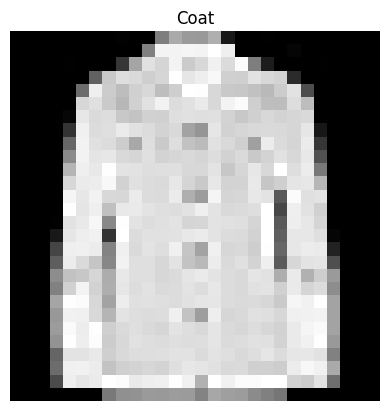

In [14]:
# Show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap= 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {img.shape}')
print(f'Label: {label}, Label size: {label.shape}')

# **Model  0: Build a baseline model**

A baseline model is a simple model we will try and improve upon with subsequent models/experiments.

It's best practice to start with a baseline model. Start simply and add complexity when necessary.

In [15]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x  = train_features_batch[0]

# Flatten the sample
output =flatten_model(x)

# Print what happened
print(f'Shape before flattening: {x.shape}')  # (color_channels, height, width)
print(f'Shape after flattening: {output.shape}')  # (color_channels, height*width)

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack =  nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape= 784,  # thats 28*28
    hidden_units= 10,  # number of units in the hidden layer
    output_shape= len(class_names) # one ffor every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x = torch.rand(1, 1, 28, 28)
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [19]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

# **Setup loss function, optimizer and evaluation metrics**

In [20]:
import requests
from pathlib import Path

# Download helper functions
if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py', 'wb')as f:
    f.write(request.content)

In [21]:
# import accuracy function
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.1)

# **Creating a function to time our experiments**

Two main things we want to track are : Performance  (loss and accuracy values) and Speed (how fast model runs)

In [22]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds')
  return total_time

# **Creating a training loop and training a model on batches of data**

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the *train loss* per batch.
3. Loop through testing batches, perform testing steps, calculate the *test loss* per batch.
4. Print whats going on.
5. Time it all.

In [23]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n------')
  # Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    # Forward pass
    y_pred = model_0(X)

    # Calculate the loss(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulate train loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # print whats happenin
  if batch % 400 == 0:
    print(f'Looked at:  {batch * len(X)/ {len(train_dataloader.dataset)}} samples.')

  # Divide total train loss by the length of train daataloaader
  train_loss /=len(train_dataloader)

  # Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward pass
      test_pred = model_0(X_test)

      # Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # Calculate accuracy
      test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim = 1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Caalculate the test accuraacy average per batch
    test_acc /= len(test_dataloader)

  # Print whats haappening
  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}')

# Calculate the train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu,
                                              end= train_time_end_on_cpu,
                                              device= str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
------

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
------

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 28.543 seconds


# **Make predictions and get Model 0 results**

In [24]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  """Returns a dictionary containing the results of model preidting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss andd acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true= y, y_pred= y_pred.argmax(dim= 1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{'model_name': model.__class__.__name__,  # Only works when model was created with a class
        'model_loss': loss.item(), 'model_acc': acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model= model_0, data_loader= test_dataloader,
                             loss_fn= loss_fn, accuracy_fn= accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# **Setup device agnostic-code(for using a GPU if there is one)**

In [25]:
!nvidia-smi

Tue Oct  7 14:21:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [26]:
torch.cuda.is_available()

True

In [27]:
# Setup device agnostic code
import torch
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# **Model 1: Building a better model with non-linearity**

In [28]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),  # flatten inputs into a single vector
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features= output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [29]:
next(model_0.parameters()).device

device(type='cpu')

In [30]:
# Create an instance of model 1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784,  #this is the output of the flatten after our 28*28 image goes in
                              hidden_units= 10,
                              output_shape= len(class_names)).to(device) # send to the GPU if it's available

next(model_1.parameters()).device

device(type='cuda', index=0)

# **Setup loss, optimizer and evaluation metrics**

In [31]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr= 0.1)

# **Functionizing training and evaluation/testing loops**

In [32]:
# Creating a train loop function
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a traaining with model trying to learn on data loader."""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    # Calculate the loss(per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss  # accumulate train loss
    train_acc += accuracy_fn(y_true= y, y_pred= y_pred.argmax(dim=1)) # go from logits -> prediction labels

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step
    optimizer.step()

  # Divide total train loss and acc by the length of train dataloader
  train_loss /=len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%')

In [33]:
# Creating a test loop function
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """Performs a testing loop step on model going over data_loader"""

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device
      X, y = X.to(device), y.to(device)

      # Forward pass (outputs raw logits)
      test_pred = model(X)

      # Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y)

      # Calculate accuracy
      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim = 1)) # go from logits -> prediction labels

    # Calculate the test loss and acc average per batch and print
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f'Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n')

In [34]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr= 0.1)

In [35]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n-------')
  train_step(model= model_1,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn = accuracy_fn,
             device= device)

  test_step(model= model_1,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start= train_time_start_on_gpu,
                                              end= train_time_end_on_gpu,
                                              device= device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636, Test acc: 65.00%

Epoch: 1
-------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227, Test acc: 73.91%

Epoch: 2
-------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500, Test acc: 75.02%

Train time on cuda: 29.484 seconds


In [36]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [37]:
total_train_time_model_0

28.543455762000008

In [38]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device= device):
  """Returns a dictionary containing the results of model preidting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss andd acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true= y, y_pred= y_pred.argmax(dim= 1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return{'model_name': model.__class__.__name__,  # Only works when model was created with a class
        'model_loss': loss.item(), 'model_acc': acc}

In [39]:
# Get Model 1 results dict
model_1_results = eval_model(model= model_1,
                             data_loader= test_dataloader,
                             loss_fn= loss_fn,
                             accuracy_fn = accuracy_fn,
                             device= device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

# **Model 2: Building a Convolutional Neural Network (CNN)**

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.
For more check this - https://poloclub.github.io/cnn-explainer/

In [40]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architechture that replicates the TunyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
      )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride= 1,
                  padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2)
      )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*7*7,  # there's a trick to calculating this ....
                  out_features= output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # (f'Output shape of convprint_block_1: {x.shape}')
    x = self.conv_block_2(x)
    # print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    # print(f'Output shape of classifier: {x.shape}')
    return x

In [41]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape= 1,
                              hidden_units= 10,
                              output_shape= len(class_names)).to(device)

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [42]:
# Pass image through model 2
rand_image_tensor = torch.randn(size=(1, 1, 28,28))
rand_image_tensor.shape

torch.Size([1, 1, 28, 28])

In [43]:
model_2(rand_image_tensor.to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], device='cuda:0', grad_fn=<AddmmBackward0>)

# **Stepping through `nn.Conv2d()`**

In [44]:
import torch
from torch import nn

In [45]:
torch.manual_seed(42)
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [46]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels= 3,
                       out_channels= 10,
                       kernel_size= 3,
                       stride= 1,
                       padding= 1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

# **Stepping through `nn.Maxpool2d()`**

In [47]:
# Create a sample nn.Maxpool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

# Pass data through the conv_layer
through_conv = conv_layer(test_image)
print(f'Shape after conv: {through_conv.shape}')

# Pass through the max pool layer
through_conv_and_max = max_pool_layer(through_conv)
print(f'Shape after conv and maxpool: {through_conv_and_max.shape}')

Shape after conv: torch.Size([10, 64, 64])
Shape after conv and maxpool: torch.Size([10, 32, 32])


# **Setup a loss function and optimizer for `model_2`**

In [48]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr= 0.1)

# **Training and testing `model_2` using our training and testing functions**

In [49]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as Timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f'Epoch: {epoch}\n---------')
  train_step(model= model_2,
             data_loader= train_dataloader,
             loss_fn= loss_fn,
             optimizer= optimizer,
             accuracy_fn= accuracy_fn,
             device= device)
  test_step(model= model_2,
            data_loader= test_dataloader,
            loss_fn= loss_fn,
            accuracy_fn= accuracy_fn,
            device= device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.60003 | Train acc: 78.21%
Test loss: 0.41121, Test acc: 85.08%

Epoch: 1
---------
Train loss: 0.36505 | Train acc: 86.90%
Test loss: 0.35101, Test acc: 86.87%

Epoch: 2
---------
Train loss: 0.32579 | Train acc: 88.10%
Test loss: 0.32075, Test acc: 88.40%

Train time on cuda: 35.923 seconds


In [50]:
# Get model_2 reesults
model_2_results = eval_model(
    model= model_2,
    data_loader= test_dataloader,
    loss_fn= loss_fn,
    accuracy_fn= accuracy_fn,
    device= device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3207487165927887,
 'model_acc': 88.39856230031948}

# **Compare model results and training time**

In [51]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.320749,88.398562


In [52]:
# Add training time to results comparison
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results


,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,28.543456
1,FashionMNISTModelV1,0.685001,75.019968,29.484227
2,FashionMNISTModelV2,0.320749,88.398562,35.923235


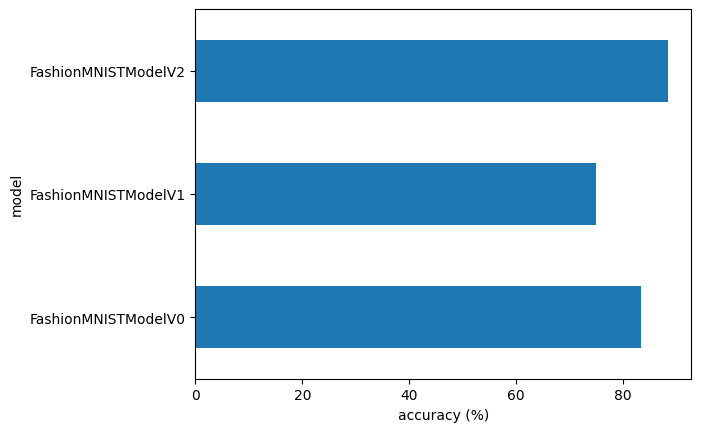

In [53]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind= 'barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model');

# **Make and evaluate random predictions with best model**

In [54]:
def make_predictions(model: torch.nn.Module,
                      data: list,
                      device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to the target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get predition probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [55]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sneaker')

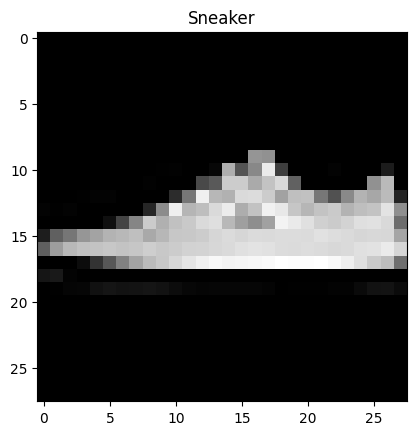

In [56]:
plt.imshow(test_samples[0].squeeze(), cmap= 'gray')
plt.title(class_names[test_labels[0]])

In [57]:
# Make predictions
pred_probs = make_predictions(model= model_2,
                              data= test_samples)

# View the first two prediction probabilities
pred_probs[:2]

tensor([[1.4574e-07, 1.9722e-07, 4.0045e-07, 1.8092e-05, 1.5944e-07, 8.9529e-04,
         4.8132e-08, 9.9889e-01, 3.9385e-05, 1.5278e-04],
        [1.8516e-04, 2.4280e-05, 5.0451e-05, 4.2714e-04, 3.8047e-05, 3.2109e-02,
         2.3904e-04, 2.3825e-03, 1.5716e-03, 9.6297e-01]])

In [58]:
# Convert preditiction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([7, 9, 2, 8, 9, 1, 1, 9, 6])

In [59]:
test_labels[:10]

[7, 9, 4, 8, 9, 1, 1, 9, 6]

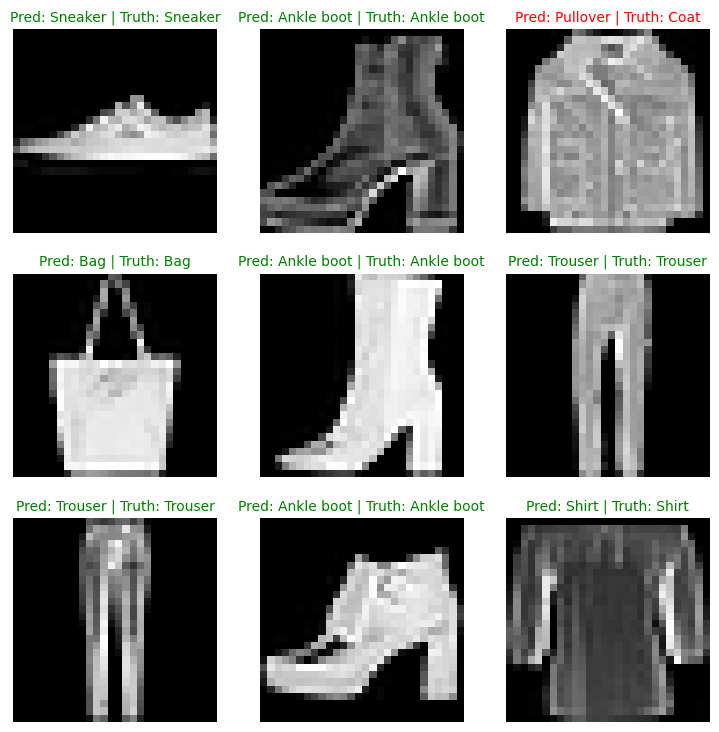

In [60]:
# Plot predictions
plt.figure(figsize= (9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap= 'gray')

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f'Pred: {pred_label} | Truth: {truth_label}'

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = 'g')
  else:
    plt.title(title_text, fontsize = 10, c = 'r')

  plt.axis(False)



# **Making a confusion matrix for further prediction evaluation**

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [61]:
# importtqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= 'Making predictions.....'):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim= 0).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Making predictions.....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [62]:
len(y_pred_tensor)

10000

In [63]:
# See if required packages are installed and if not, install em
try:
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split('.')[1] >=19, 'mlxtend version should be 0.19.0 or higher')
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'mlxtend version: {mlxtend.__version__}')



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 53.5 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [64]:
torchmetrics.__version__, mlxtend.__version__

('1.8.2', '0.23.4')

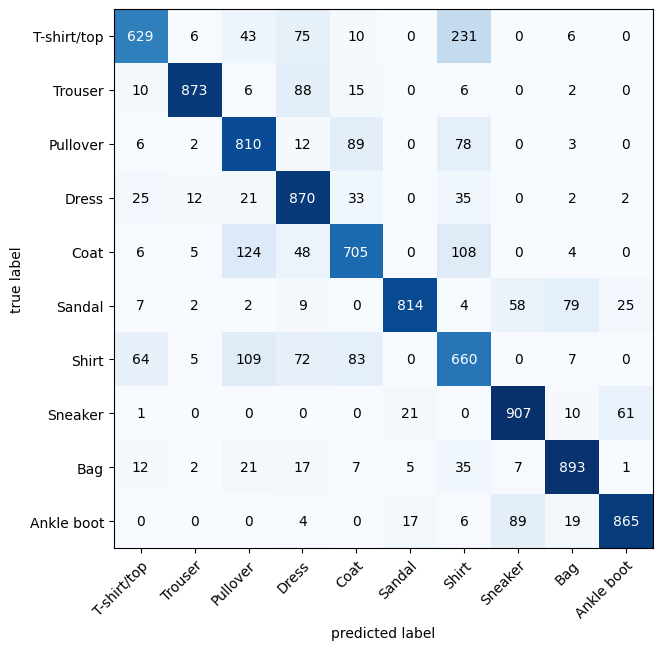

In [65]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task= 'multiclass', num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat= confmat_tensor.numpy(), # matplotlib works with numpy
                                figsize= (10,7),
                                class_names= class_names)



# **Save and load best performing model**

In [66]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents= True, exist_ok= True)

# Create model save
MODEL_NAME = 'pytorch_computer_vision_model_2.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj= model_2.state_dict(),
           f= MODEL_SAVE_PATH)

Saving model to: models/pytorch_computer_vision_model_2.pt


In [67]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape= 1,
                                     hidden_units= 10,
                                     output_shape= 10)

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f= MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [68]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3207487165927887,
 'model_acc': 88.39856230031948}

In [69]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model= loaded_model_2,
                                    data_loader= test_dataloader,
                                    loss_fn= loss_fn,
                                    accuracy_fn= accuracy_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3207487165927887,
 'model_acc': 88.39856230031948}

In [70]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol= 1e-08)

tensor(True)